# Importing Libraries

In [53]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster

# Setting seaborn style
sns.set(style='ticks', palette='colorblind', font_scale=1.5)

# Importing Data

In [54]:
# Importing Data from flat file - CSV
# Creating Pandas DataFrame from CSV
df = pd.read_csv('melb_data.csv')

In [55]:
# Check to see all data is present in data set - Top
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [56]:
# Check to see all data is present in data set - Bottom
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [57]:
# DataFrame information -  21 Columns, 13580 Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Cleaning Data

In [58]:
# Sorting the Data
# As the majority of the questions are related to Suburb and Price of the house; Suburb in alphabetical order, and by the highest price
df = df.sort_values(by=["Suburb", "Price"], ascending = [True, False])
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
10876,Abbotsford,143 Charles St,3,h,1635000.0,S,Nelson,12/08/2017,3.0,3067.0,...,1.0,0.0,142.0,130.0,1880.0,Yarra,-37.80359,144.99538,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,24/09/2016,2.5,3067.0,...,3.0,1.0,0.0,NaN,NaN,Yarra,-37.79940,144.99650,Northern Metropolitan,4019.0
10879,Abbotsford,1/50 Valiant St,4,t,1525000.0,S,Jellis,12/08/2017,3.0,3067.0,...,2.0,2.0,102.0,NaN,NaN,Yarra,-37.80116,145.00066,Northern Metropolitan,4019.0
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
27,Abbotsford,48 Abbotsford St,3,h,1447500.0,PI,Nelson,22/08/2016,2.5,3067.0,...,3.0,1.0,166.0,174.0,2012.0,Yarra,-37.80170,145.00010,Northern Metropolitan,4019.0
10094,Abbotsford,67 Yarra St,3,h,1402500.0,S,Jellis,27/05/2017,3.0,3067.0,...,1.0,1.0,270.0,101.0,1960.0,Yarra,-37.80230,144.99615,Northern Metropolitan,4019.0


In [59]:
# Changing Data types
# Converting Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
# Converting floats to int64
df['YearBuilt'] = df['YearBuilt'].astype('Int64')
df['Postcode'] = df['Postcode'].astype('Int64')
df['Propertycount'] = df['Propertycount'].astype('Int64')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
10876,Abbotsford,143 Charles St,3,h,1635000.0,S,Nelson,2017-08-12,3.0,3067,...,1.0,0.0,142.0,130.0,1880,Yarra,-37.80359,144.99538,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,2016-09-24,2.5,3067,...,3.0,1.0,0.0,NaN,<NA>,Yarra,-37.79940,144.99650,Northern Metropolitan,4019


In [60]:
# Renaming columns
df.rename(columns={"Lattitude": "Latitude"}, inplace=True)
df.rename(columns={"Longtitude": "Longitude"}, inplace=True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
10876,Abbotsford,143 Charles St,3,h,1635000.0,S,Nelson,2017-08-12,3.0,3067,...,1.0,0.0,142.0,130.0,1880,Yarra,-37.80359,144.99538,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,2016-09-24,2.5,3067,...,3.0,1.0,0.0,NaN,<NA>,Yarra,-37.79940,144.99650,Northern Metropolitan,4019


In [61]:
# Get the earliest and latest dates a house was sold: 1st Jan 2016 - 23rd Sep 2017
first_date = df['Date'].min()
last_date = df['Date'].max()
# Print the results
print("First (earliest) date:", first_date)
print("Last (latest) date:", last_date)

First (earliest) date: 2016-01-28 00:00:00
Last (latest) date: 2017-09-23 00:00:00


In [62]:
# Checking for Duplicates 
# Checking Addresses as this will be the index (unique ID) - 202 duplicates
df.duplicated(subset=['Address']).value_counts()

False    13378
True       202
Name: count, dtype: int64

### Investigating why there is Duplicates:

In [63]:
# Find duplicates based on 'Address'
duplicate_mask = df.duplicated(subset=['Address'], keep=False)
# Filter the DataFrame to show duplicated addresses
df2 = df[duplicate_mask]
# Sort the duplicate rows by 'Address'
df2 = df2.sort_values(by=["Address"], ascending=True)
# Display the result - See that there has been instances where the house has been sold twice within the time period
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
9281,Preston,1 Bellarine St,5,h,1400000.0,PI,hockingstuart,2017-06-03,8.4,3072,...,2.0,2.0,558.0,217.0,1925,Darebin,-37.73472,144.99658,Northern Metropolitan,14577
4958,Preston,1 Bellarine St,4,h,1400000.0,VB,Jellis,2017-03-18,8.8,3072,...,2.0,2.0,559.0,217.0,1925,Darebin,-37.73470,144.99660,Northern Metropolitan,14577
7802,Essendon,1 Daisy St,4,h,1400000.0,VB,Nelson,2017-04-08,8.0,3040,...,2.0,1.0,267.0,NaN,<NA>,Moonee Valley,-37.75580,144.91060,Western Metropolitan,9264
9144,Essendon,1 Daisy St,4,h,1360000.0,S,Jellis,2017-06-03,7.5,3040,...,2.0,1.0,267.0,NaN,<NA>,Moonee Valley,-37.75472,144.92723,Western Metropolitan,9264
8055,Maidstone,1/1 Clarendon St,3,t,675000.0,S,Biggin,2017-04-22,9.2,3012,...,2.0,2.0,159.0,128.0,2016,Maribyrnong,-37.78500,144.86730,Western Metropolitan,3873


In [64]:
# Decided to remove the older dates of the house, Keeping only the newest pricing information on each Address for my analysis
# Sort by Address and Date
df = df.sort_values(by=['Address', 'Date'], ascending=[True, False])
# Dropping duplicates - leaving only the most recent (first)
df_deduped = df.drop_duplicates(subset=['Address'], keep='first')
# Updating original dataframe
df = df_deduped
# Sorting dataframe
df = df.sort_values(by=["Suburb", "Price"], ascending = [True, False])
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
10876,Abbotsford,143 Charles St,3,h,1635000.0,S,Nelson,2017-08-12,3.0,3067,...,1.0,0.0,142.0,130.0,1880,Yarra,-37.80359,144.99538,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
30,Abbotsford,31 Turner St,4,h,1542000.0,S,Collins,2016-09-24,2.5,3067,...,3.0,1.0,0.0,NaN,<NA>,Yarra,-37.79940,144.99650,Northern Metropolitan,4019
10879,Abbotsford,1/50 Valiant St,4,t,1525000.0,S,Jellis,2017-08-12,3.0,3067,...,2.0,2.0,102.0,NaN,<NA>,Yarra,-37.80116,145.00066,Northern Metropolitan,4019
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,1.0,1.0,202.0,NaN,<NA>,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,2.0,0.0,134.0,150.0,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
27,Abbotsford,48 Abbotsford St,3,h,1447500.0,PI,Nelson,2016-08-22,2.5,3067,...,3.0,1.0,166.0,174.0,2012,Yarra,-37.80170,145.00010,Northern Metropolitan,4019
10094,Abbotsford,67 Yarra St,3,h,1402500.0,S,Jellis,2017-05-27,3.0,3067,...,1.0,1.0,270.0,101.0,1960,Yarra,-37.80230,144.99615,Northern Metropolitan,4019


In [65]:
# Confirming duplicates have been removed successfully
df.duplicated(subset=['Address']).value_counts()

False    13378
Name: count, dtype: int64

In [66]:
# Setting the address as index
df = df.set_index('Address')
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
Address,,,,,,,,,,,,,,,,,,,,
124 Yarra St,Abbotsford,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,4.0,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
98 Charles St,Abbotsford,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,2.0,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
143 Charles St,Abbotsford,3,h,1635000.0,S,Nelson,2017-08-12,3.0,3067,3.0,1.0,0.0,142.0,130.0,1880,Yarra,-37.80359,144.99538,Northern Metropolitan,4019
55a Park St,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3.0,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
31 Turner St,Abbotsford,4,h,1542000.0,S,Collins,2016-09-24,2.5,3067,4.0,3.0,1.0,0.0,NaN,<NA>,Yarra,-37.79940,144.99650,Northern Metropolitan,4019


# Data Analysis

## What is the average Home Price in South Yarra for each number of bedrooms

In [67]:
# Group by Suburb and number of bedrooms, then calculate the average price
avg_price_by_suburb_bed = df.groupby(['Suburb', 'Rooms'])['Price'].mean().reset_index()
# Rename for clarity
avg_price_by_suburb_bed.rename(columns={'Price': 'Average_Price'}, inplace=True)
# Filtering to South Yarra
south_yarra_data = avg_price_by_suburb_bed[avg_price_by_suburb_bed['Suburb'] == 'South Yarra']
# Display the result
print("Average Price of Houses by number of Rooms in South Yarra:")
south_yarra_data

Average Price of Houses by number of Rooms in South Yarra:


,Suburb,Rooms,Average_Price
932,South Yarra,1,4.731660e+05
933,South Yarra,2,8.531598e+05
934,South Yarra,3,1.643039e+06
935,South Yarra,4,2.965417e+06


## What is the correlation between House Price and the Distance to the CBD

In [68]:
# Drop rows with missing Price or Distance
df_clean = df[['Price', 'Distance']].dropna()
# Correlation between Price and Distance
correlation = df_clean['Price'].corr(df_clean['Distance'])
print(f"Correlation between Price and Distance: {correlation:.3f}")

Correlation between Price and Distance: -0.163


Very Weak negative correlation. As the distance to the CBD increases, the house price tends to decrease slightly. Therefore properties closer to the CBD tend to be more expensive. Other factors are likely influencing house prices more than just distance.

In [69]:
# Mutliple Regression to see the combined effect of Distance to the CBD and number of Rooms on Price
# Clean the data and remove non-positive prices (log(0) is undefined)
df_clean = df[['Price', 'Distance', 'Rooms']].dropna() # Keep only relevant columns and drop rows with missing values
df_clean = df_clean[df_clean['Price'] > 0] # Remove rows where price is 0 or negative (log undefined)

# Log-transform the target
df_clean['LogPrice'] = np.log(df_clean['Price']) # Apply natural log to price to reduce skew and stabilize variance

# Set up predictors and target
X = df_clean[['Distance', 'Rooms']] # Define independent variables (features)
y = df_clean['LogPrice'] # Define dependent variable (log of price)

# Add constant term (intercept)
X = sm.add_constant(X) # Adds a column of 1s to X for the regression intercept

# Fit the model
model = sm.OLS(y, X).fit() # Fit a multiple linear regression model using OLS (Ordinary Least Squares)

# Print regression results
print("\nLog-Transformed Regression Summary:\n")
print(model.summary())


Log-Transformed Regression Summary:

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     4969.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:01:46   Log-Likelihood:                -6685.2
No. Observations:               13378   AIC:                         1.338e+04
Df Residuals:                   13375   BIC:                         1.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

Ran a multiple linear regression on log-transformed house prices to model the effect of distance from the Melbourne CBD and number of rooms. The model explains about 42.6% of the variation in prices (R² = 0.426), a reasonable fit for real estate data.
* Distance has a negative relationship with price: each additional km from the CBD reduces price by approximately 3.14%, holding other variables constant.
* Number of rooms has a strong positive effect: each additional room increases price by approximately 36.6%, on average.
* Both predictors are statistically significant (p < 0.001). The log-transformation improved model performance and reduced skewness in the residuals, although some non-random error remains (Durbin-Watson = 0.739).

## Which Suburb has the newest Housing and which Suburb has the oldest Housing?

In [70]:
# Remove rows where YearBuilt is NaN
df_no_nan = df.dropna(subset=['YearBuilt'])

# Group by Suburb and calculate both mean and median YearBuilt
year_built_stats = df_no_nan.groupby('Suburb')['YearBuilt'].agg(
    Mean_Year_Built='mean',
    Median_Year_Built='median'
).reset_index()

# Convert to Int
year_built_stats['Mean_Year_Built'] = year_built_stats['Mean_Year_Built'].round().astype('Int64')
year_built_stats['Median_Year_Built'] = year_built_stats['Median_Year_Built'].astype('Int64')

# Sort by Mean Year Built descending
year_built_stats = year_built_stats.sort_values(by='Mean_Year_Built', ascending=False)

# Display the top 10 suburbs with the newest Housing
ten_newest_housing_suburbs = year_built_stats.head(10)
print("Displaying the 10 Suburbs with the averagest Newest built houses that have sold recently:")
ten_newest_housing_suburbs

Displaying the 10 Suburbs with the averagest Newest built houses that have sold recently:


,Suburb,Mean_Year_Built,Median_Year_Built
216,Officer,2015,2015
293,Williams Landing,2014,2014
222,Plumpton,2012,2012
188,Mernda,2012,2012
297,Wollert,2012,2012
100,Doreen,2012,2011
230,Riddells Creek,2011,2011
238,Sandhurst,2010,2010
41,Brookfield,2010,2010
93,Derrimut,2010,2010


In [71]:
# Display the top 10 suburbs with the oldest Housing
ten_oldest_housing_suburbs = year_built_stats.tail(10)
print("Displaying the 10 Suburbs with the averagest Oldest built houses that have sold recently:")
ten_oldest_housing_suburbs

Displaying the 10 Suburbs with the averagest Oldest built houses that have sold recently:


,Suburb,Mean_Year_Built,Median_Year_Built
120,Flemington,1936,1930
244,Seddon,1936,1916
64,Caulfield East,1934,1937
247,South Melbourne,1933,1900
172,Kooyong,1930,1930
181,McKinnon,1930,1929
119,Fitzroy North,1930,1902
189,Middle Park,1914,1900
4,Albert Park,1904,1900
227,Princes Hill,1900,1900


## Which Suburbs have properties with the largest average Land & Building size 

In [72]:
# Remove rows where either Landsize or BuildingArea is NaN
df_no_nan = df.dropna(subset=['Landsize', 'BuildingArea'])
# Group by Suburb and calculate all stats
avg_size_suburb = df_no_nan.groupby('Suburb').agg(
    Mean_Landsize=('Landsize', 'mean'),
    Median_Landsize=('Landsize', 'median'),
    Mean_BuildingSize=('BuildingArea', 'mean'),
    Median_BuildingSize=('BuildingArea', 'median')
).reset_index()
# Sort by mean landsize (you can change to another column if preferred)
avg_landsize_suburb = avg_size_suburb.sort_values(by='Mean_Landsize', ascending=False).head(15)
avg_buildingsize_suburb = avg_size_suburb.sort_values(by='Mean_BuildingSize', ascending=False).head(15)
avg_landsize_suburb.rename(columns={
    'Mean_Landsize': 'Mean Landsize (m²)',
    'Median_Landsize': 'Median Landsize (m²)',
    'Mean_BuildingSize': 'Mean BuildingSize (m²)',
    'Median_BuildingSize': 'Median BuildingSize (m²)',
}, inplace=True)
# Show top 15 suburbs with the largest average land size for properties
print("Displaying the top 15 Suburbs with the Largest average Land Size for properties:")
avg_landsize_suburb

Displaying the top 15 Suburbs with the Largest average Land Size for properties:


,Suburb,Mean Landsize (m²),Median Landsize (m²),Mean BuildingSize (m²),Median BuildingSize (m²)
204,New Gisborne,44500.000000,44500.0,44515.000000,44515.00
128,Gisborne,4709.000000,978.0,155.400000,144.00
274,Travancore,2934.666667,479.0,126.250000,110.75
209,North Warrandyte,2839.000000,2839.0,234.000000,234.00
199,Mount Evelyn,1650.000000,1650.0,114.000000,114.00
230,Riddells Creek,1459.000000,1459.0,272.400000,272.40
180,Maribyrnong,1391.516667,355.5,147.402333,139.50
108,Eltham North,1034.750000,802.0,197.750000,202.00
154,Hurstbridge,1034.000000,1034.0,225.000000,225.00
126,Frankston South,1033.000000,810.5,188.500000,180.00


In [73]:
# Reorder and rename columns manually for better reading
avg_buildingsize_suburb = avg_buildingsize_suburb[
    ['Suburb', 'Mean_BuildingSize', 'Mean_Landsize', 'Median_Landsize', 'Median_BuildingSize']
]
avg_buildingsize_suburb.rename(columns={
    'Mean_Landsize': 'Mean Landsize (m²)',
    'Median_Landsize': 'Median Landsize (m²)',
    'Mean_BuildingSize': 'Mean BuildingSize (m²)',
    'Median_BuildingSize': 'Median BuildingSize (m²)',
}, inplace=True)
# Display suburbs with the largest average building size for properties
print("Displaying the top 15 Suburbs with the Largest average Building Size for properties:")
avg_buildingsize_suburb

Displaying the top 15 Suburbs with the Largest average Building Size for properties:


,Suburb,Mean BuildingSize (m²),Mean Landsize (m²),Median Landsize (m²),Median BuildingSize (m²)
204,New Gisborne,44515.000000,44500.000000,44500.0,44515.0
218,Pakenham,426.500000,576.500000,576.5,426.5
46,Bulleen,413.225806,589.064516,646.0,180.0
172,Kooyong,339.000000,620.000000,620.0,339.0
72,Clarinda,305.333333,519.666667,532.0,177.0
171,Knoxfield,281.000000,900.000000,900.0,281.0
230,Riddells Creek,272.400000,1459.000000,1459.0,272.4
149,Highett,262.454545,476.454545,591.0,183.0
268,Templestowe,260.818182,734.363636,787.0,215.0
255,St Helena,260.000000,1016.000000,1016.0,260.0


In [74]:
# Checking which Suburbs appear in the top 15 suburbs for largest average building size and land size
common_suburbs = set(avg_landsize_suburb['Suburb']).intersection(set(avg_buildingsize_suburb['Suburb']))
print("Suburbs with large land AND building sizes:", common_suburbs)

Suburbs with large land AND building sizes: {'New Gisborne', 'St Helena', 'Riddells Creek'}


## Specific Scenario: Sally requires being no further than 2km from the CBD for work, has 2 kids and therefore needs 3 bedrooms and a car parking space. Please provide a list of the 10 cheapest houses that have been sold that suit Sally's requirements and the average price she could expect to pay

In [75]:
# Filter properties for Sally
sally_df = df[
    (df['Distance'] <= 2) &
    (df['Rooms'] >= 3) &
    (df['Car'] >= 1)
]
# Select useful columns
sally_df = sally_df[['Price', 'Distance', 'Rooms', 'Car', 'Suburb']]

# Sort by price (optional)
sally_df = sally_df.sort_values(by='Price')
# Caculate avg price - using median to show what a “typical” property sells for
average_price = sally_df['Price'].median()

# Print insights
print("1) There are", sally_df['Price'].count(), "Properties that match Sally's requirements.")
print(f"2) Sally can expect to pay roughly ${average_price:,.0f} on her Property.") # Formatting price
# Display table as plain text, nicely formatted and print
cheapest = sally_df.head(10).reset_index()
cheapest['Price'] = cheapest['Price'].apply(lambda x: f"${x:,.0f}")
cheapest['Distance'] = cheapest['Distance'].apply(lambda x: f"{x:.1f} km")
print("3) The cheapest properties sold recently that match Sally's requirements are:")
print(cheapest)

1) There are 77 Properties that match Sally's requirements.
2) Sally can expect to pay roughly $1,326,000 on her Property.
3) The cheapest properties sold recently that match Sally's requirements are:
                Address     Price Distance  Rooms  Car           Suburb
0     19/33 Jeffcott St  $601,000   1.9 km      3  1.0   West Melbourne
1   1004/58 Jeffcott St  $650,000   1.9 km      3  1.0   West Melbourne
2    108/33 Jeffcott St  $660,000   1.9 km      3  1.0   West Melbourne
3  18/375 Abbotsford St  $681,000   1.8 km      3  1.0  North Melbourne
4  41/106 Southbank Bvd  $720,000   1.2 km      3  1.0        Southbank
5        61/88 Wells St  $720,000   1.2 km      3  1.0        Southbank
6   46/121 Rathdowne St  $735,000   1.8 km      3  2.0          Carlton
7        7/100 Wells St  $740,000   1.2 km      3  1.0        Southbank
8      10/5 St David St  $850,000   1.6 km      3  1.0          Fitzroy
9       7/517 Royal Pde  $850,000   1.8 km      3  1.0        Parkville


## Visualising the geographic data - displaying each of the houses that have been sold and their locations on a map

In [76]:
# Create a map centered on Melbourne CBD
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a MarkerCluster object to group close points
marker_cluster = MarkerCluster().add_to(melbourne_map)

# Loop through the DataFrame and add each property as a marker
for idx, row in df.iterrows():
    # Prepare popup content with formatted price and suburb
    popup_text = (
        f"<b>Suburb:</b> {row['Suburb']}<br>"
        f"<b>Price:</b> ${row['Price']:,.0f}"
    )
    # Add marker to the cluster
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='home', prefix='fa')  # Adding home icon
    ).add_to(marker_cluster)

# Save to a HTML file
melbourne_map.save('melbourne_house_sales_map.html')


## Time Related Analysis
### Analysis on the properties that were sold multiple times

In [77]:
# Checking the earliest and latest dates of data frame created earlier which contains houses that have been sold more than once within the period
first_date = df2['Date'].min()
last_date = df2['Date'].max()
# Print the results
print("First (earliest) date:", first_date)
print("Last (latest) date:", last_date)

First (earliest) date: 2016-04-16 00:00:00
Last (latest) date: 2017-09-23 00:00:00


In [78]:
# Looking at first 10 rows of sub data frame
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
9281,Preston,1 Bellarine St,5,h,1400000.0,PI,hockingstuart,2017-06-03,8.4,3072,...,2.0,2.0,558.0,217.0,1925,Darebin,-37.73472,144.99658,Northern Metropolitan,14577
4958,Preston,1 Bellarine St,4,h,1400000.0,VB,Jellis,2017-03-18,8.8,3072,...,2.0,2.0,559.0,217.0,1925,Darebin,-37.73470,144.99660,Northern Metropolitan,14577
7802,Essendon,1 Daisy St,4,h,1400000.0,VB,Nelson,2017-04-08,8.0,3040,...,2.0,1.0,267.0,NaN,<NA>,Moonee Valley,-37.75580,144.91060,Western Metropolitan,9264
9144,Essendon,1 Daisy St,4,h,1360000.0,S,Jellis,2017-06-03,7.5,3040,...,2.0,1.0,267.0,NaN,<NA>,Moonee Valley,-37.75472,144.92723,Western Metropolitan,9264
8055,Maidstone,1/1 Clarendon St,3,t,675000.0,S,Biggin,2017-04-22,9.2,3012,...,2.0,2.0,159.0,128.0,2016,Maribyrnong,-37.78500,144.86730,Western Metropolitan,3873


## Which Properties sold for the greatest increase in the time period 2016-04-16 to 2017-09-23?

In [79]:
# Calculating the difference in price between the selling of properties
# Drop rows where Price is missing
df2 = df2.dropna(subset=['Price'])
# Sort by Address and Date
df2 = df2.sort_values(by=['Address', 'Date'])

# Group by Address and calculate differences
df2['Price_Diff'] = df2.groupby('Address')['Price'].diff()
df2['Days_Diff'] = df2.groupby('Address')['Date'].diff().dt.days

# Drop rows with NaN Price_Diff (i.e., the first sale per address)
df_price_changes = df2.dropna(subset=['Price_Diff'])

property_price_diff = df2[['Address', 'Suburb', 'Price_Diff']]
property_price_diff = property_price_diff.sort_values(by='Price_Diff', ascending=False)

# Format price
property_price_diff['Price_Diff_AUD'] = property_price_diff['Price_Diff'].apply(lambda x: f"${x:,.2f}")

# 6. Display the results
print("Top 10 Properties that had the highest increase in selling price in the period 2016-04-16 to 2017-09-23:")
property_price_diff[['Address', 'Suburb', 'Price_Diff_AUD']].head(10)

Top 10 Properties that had the highest increase in selling price in the period 2016-04-16 to 2017-09-23:


,Address,Suburb,Price_Diff_AUD
8172,21 Mitchell St,Northcote,"$2,170,000.00"
3064,16 Smith St,Hampton,"$1,828,000.00"
9948,8 Vickery St,Malvern East,"$1,700,000.00"
8103,119 Park St,Moonee Ponds,"$1,700,000.00"
1644,5 Margaret St,Canterbury,"$1,639,000.00"
13084,54 Victoria St,Williamstown,"$1,580,000.00"
5656,70 Park St,South Yarra,"$1,215,000.00"
1386,25 Gray St,Brunswick,"$1,049,000.00"
11131,44 William St,Mount Waverley,"$1,008,000.00"
7519,39 Elizabeth St,Bentleigh East,"$930,000.00"


## Which suburbs have had the highest number of resales and did the properties increase/decrease in value within the 2016 - 2017 Period?

Graph showing the 25 Suburbs that have had the highest resales and their average increase/decrease in property value:


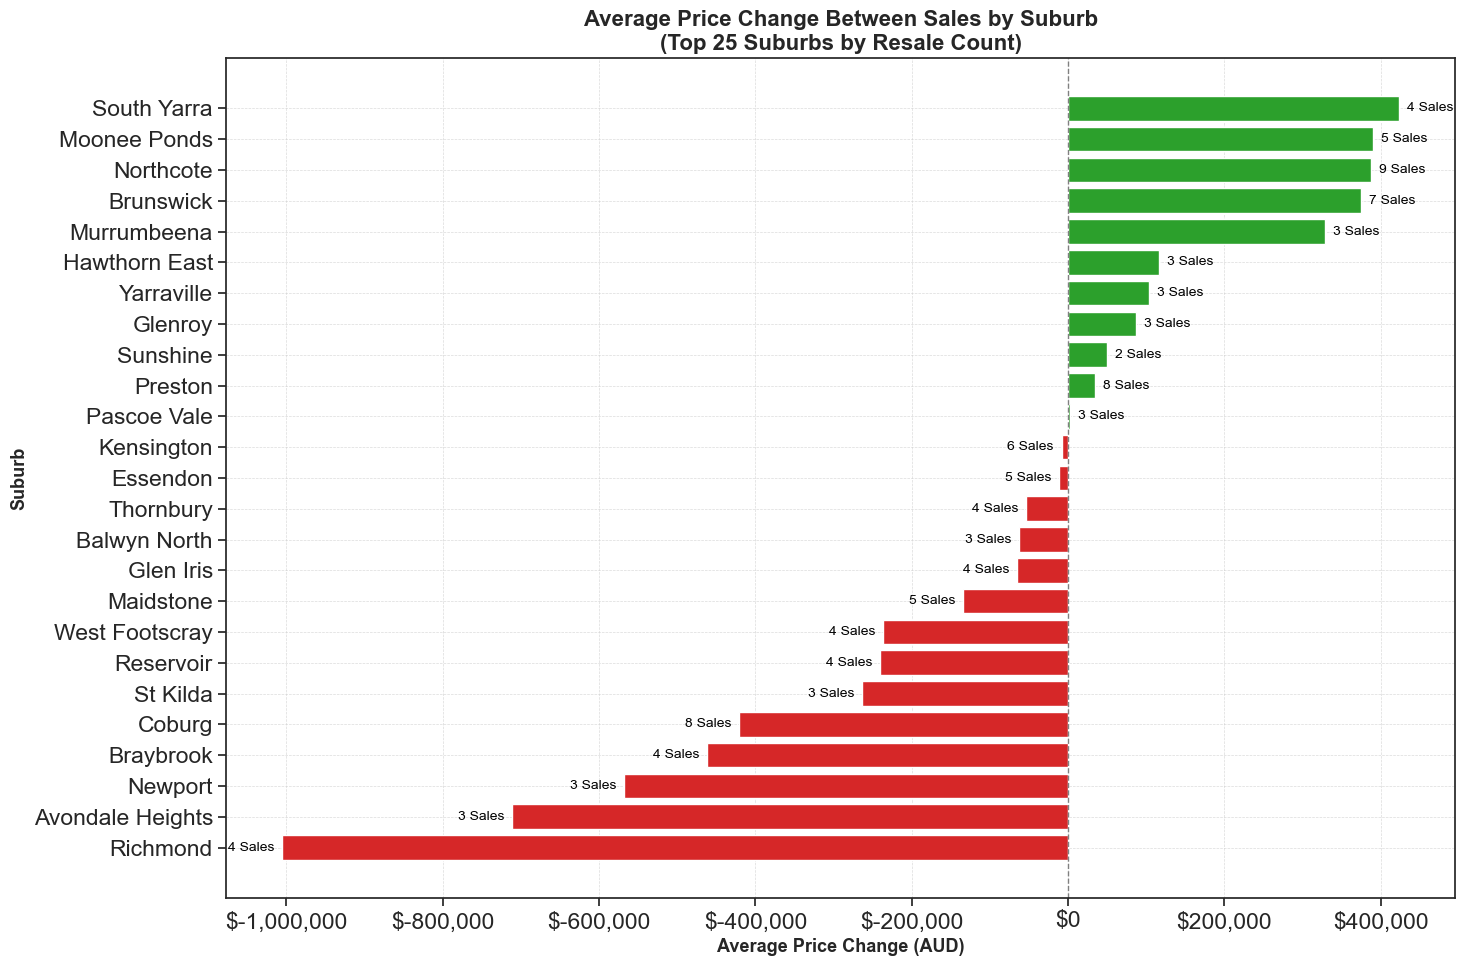

In [80]:
# Drop rows with NaN Price_Diff (i.e., the first sale per address)
df_price_changes = df2.dropna(subset=['Price_Diff'])

# Top 25 suburbs by number of resales
top_suburbs = df_price_changes['Suburb'].value_counts().nlargest(25).index
filtered_df = df_price_changes[df_price_changes['Suburb'].isin(top_suburbs)]

# Group by Suburb
summary = filtered_df.groupby('Suburb').agg(
    Avg_Price_Diff=('Price_Diff', 'mean'),
    Sale_Count=('Price_Diff', 'count')
).sort_values(by='Avg_Price_Diff')

# Add color: red for negative, green for positive
colors = summary['Avg_Price_Diff'].apply(lambda x: '#d62728' if x < 0 else '#2ca02c')  # red/green

# Plot
plt.figure(figsize=(15, 10))
barplot = plt.barh(
    y=summary.index,
    width=summary['Avg_Price_Diff'],
    color=colors,
)
# Format x-axis
ax = plt.gca() # Get current axes
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add labels for number of sales
for i, (value, count) in enumerate(zip(summary['Avg_Price_Diff'], summary['Sale_Count'])):
    offset = 10000 if value >= 0 else -10000  # Adjust label position
    align = 'left' if value >= 0 else 'right'
    plt.text(value + offset, i, f"{count} Sales", va='center', ha=align, fontsize=10, color='black')

# Add vertical line at zero
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Titles, labels & layout
plt.title('Average Price Change Between Sales by Suburb\n(Top 25 Suburbs by Resale Count)', fontsize=16, weight='bold')
plt.xlabel('Average Price Change (AUD)', fontsize=13, weight='bold')
plt.ylabel('Suburb', fontsize=13, weight='bold')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
print("Graph showing the 25 Suburbs that have had the highest resales and their average increase/decrease in property value:")
plt.show()

## Is there a correlation between the number of days it took to resell the house and the profit?

Correlation between Days_Diff and Price_Diff: 0.100


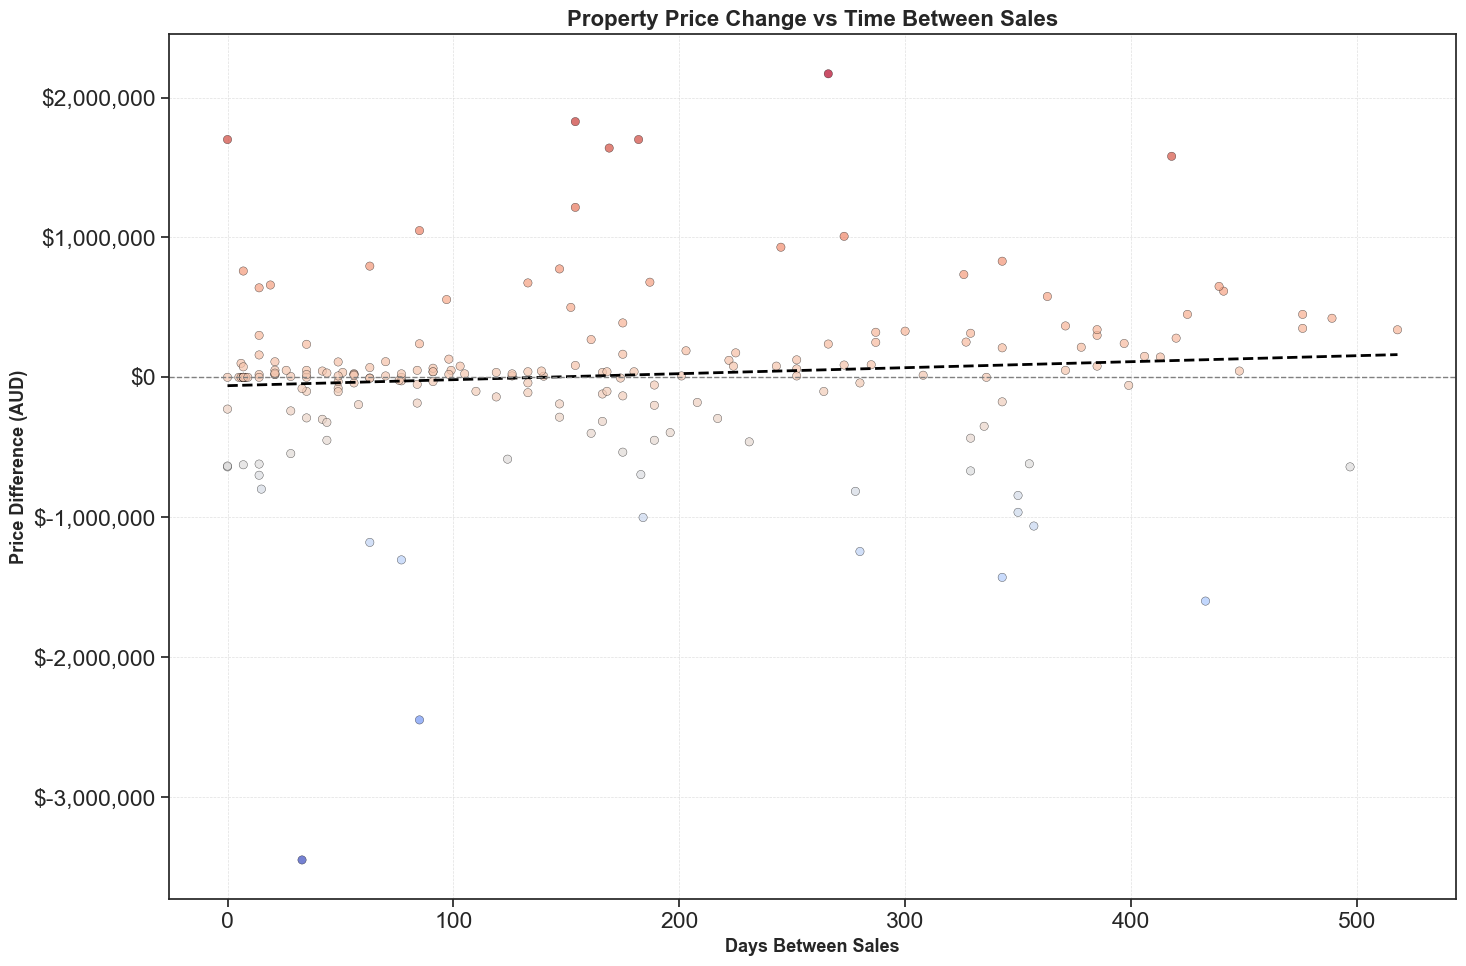

In [81]:
# Drop NaNs (first sale per address has no diff)
df_plot = df2.dropna(subset=['Price_Diff', 'Days_Diff'])

# Calculate Pearson correlation between Days_Diff and Price_Diff
correlation = df_plot['Days_Diff'].corr(df_plot['Price_Diff'])
print(f"Correlation between Days_Diff and Price_Diff: {correlation:.3f}")

# Create scatter plot of price difference vs. days between sales
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=df_plot,
    x='Days_Diff',
    y='Price_Diff',
    hue='Price_Diff', # Color points by price difference for visual emphasis
    palette='coolwarm',  # Use diverging color palette to highlight positive/negative changes
    edgecolor='black',
    linewidth=0.3,
    alpha=0.7,
    legend=False # Disable legend for cleaner plot
)

# Add a linear regression line without scatter points to highlight trend
sns.regplot(
    data=df_plot,
    x='Days_Diff',
    y='Price_Diff',
    scatter=False,   # Don't plot scatter points again
    color='black',   # Regression line color
    line_kws={'linewidth': 2, 'linestyle': '--'},
    ci=None          # Disable confidence interval shading
)

# Format y-axis ticks as currency (AUD) with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
# Format x-axis ticks as integers (days)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))

# Title and labels with styling
plt.title('Property Price Change vs Time Between Sales', fontsize=16, weight='bold')
plt.xlabel('Days Between Sales', fontsize=13, weight='bold')
plt.ylabel('Price Difference (AUD)', fontsize=13, weight='bold')

# Add horizontal line at zero price difference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Enable grid lines for improved readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Layout
plt.tight_layout()
plt.show()


The analysis shows a very weak positive correlation (r = 0.100) between the number of days between property sales and the difference in sale prices. This indicates that time between sales has minimal linear influence on price changes.

It’s important to note that this analysis only captures price changes over less than two year, limiting insights into longer-term trends. The weak correlation suggests that other factors—such as location, market conditions, property improvements, and economic variables play a much larger role in determining price differences. Additionally, the relationship between time and price change may be non-linear or affected by outliers, which limits the explanatory power of a simple linear correlation.